# Climate Change Visualization and Analysis

### Data Visualization J Component
### 20BCE1353 Siddharth S

In [1]:
import warnings
import datetime

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import plotly.offline as pyo
import plotly.graph_objs as go

import plotly.express as px
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly.subplots import make_subplots

import statsmodels.api as sm

warnings.filterwarnings("ignore")
pyo.init_notebook_mode()

### 1. Temperature Change over the years

Rising temperatures or Global Warming is a phenomenon which is a part of the Climate Change process that we have been observing since the 1900s, mostly due to industrialization and the burning of fossil fuels. We have observed a general trend of rising temperatures on average globally which will be visualized

Temperature Data obtained from https://www.kaggle.com/datasets/sevgisarac/temperature-change and https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data 

In [2]:
df = pd.read_csv("datasets/Environment_Temperature_change_E_All_Data_NOFLAG.csv", encoding='latin-1') 
df_countrycode=pd.read_csv('datasets/FAOSTAT_data_11-24-2020.csv') 

df.head(5)

Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  
1  1.950  1.950  1.950  1.950  1.950  1.950  1.950  
2  1.494 -3.187  2.699  2.251 -0.323  2.705  0.086  
3  2.597  2.597  2.597  2.597  2.597  2.597  2.597  
4  2.246 -0.076 -0.497  2.296  0.834  4.418  0.234  

[5 rows x 66 columns]

This dataset contains the change in temperature in each month measured in different areas. 

In [3]:
df.rename(columns = {'Area':'Country Name'},inplace = True)
df.set_index('Months', inplace=True)
df.rename({'Dec\x96Jan\x96Feb': 'Winter', 'Mar\x96Apr\x96May': 'Spring', 'Jun\x96Jul\x96Aug':'Summer','Sep\x96Oct\x96Nov':'Fall'}, axis='index',inplace = True)
df.reset_index(inplace = True)

df = df[df['Element'] == 'Temperature change']

df_countrycode.drop(['Country Code','M49 Code','ISO2 Code','Start Year','End Year'],axis=1,inplace=True)
df_countrycode.rename(columns = {'Country':'Country Name','ISO3 Code':'Country Code'},inplace=True)

df = pd.merge(df, df_countrycode, how='outer', on='Country Name')

df.drop(['Area Code','Months Code','Element Code','Element','Unit'],axis=1,inplace=True)

df = df.melt(id_vars=["Country Code", "Country Name","Months",], var_name="year", value_name="tem_change")
df["year"] = [i.split("Y")[-1] for i in df.year]

df.sample(5)

Country Code                  Country Name    Months  year  tem_change
145224          VIR  United States Virgin Islands       May  1990       0.285
114763          NFK                Norfolk Island  November  1984       1.028
160347          NaN            South-Eastern Asia       May  1993       0.151
72542           NaN              Northern America    Spring  1975      -0.450
115250          WSM                         Samoa       May  1984       0.537

Countries with highest temperature change in the last 10 years

In [4]:
df_c =df.copy()
df_c.set_index("year", inplace=True)
df_c = df_c.loc[['2010','2011','2012','2013','2014','2015','2016','2017','2018','2019']]
df_c.reset_index(inplace = True)


df_c = df_c.groupby(
   ['Country Name',]
).agg(
    {
        'tem_change':'mean',   
    }
)
df_c.reset_index(inplace = True)
df_c = df_c.sort_values(by=['tem_change'],ascending=False).head(10)

fig = px.bar(df_c, x="Country Name", y='tem_change' ,text='tem_change', title="Top ten countries that have highest temperature change in the last decades")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
  
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="v",
        yanchor="bottom",
        y=0.3,
        xanchor="left",
        x=1.02
))
fig.update_xaxes(tickangle = 10,
        title_text = "Countries",
        title_font = {"size": 15},
        title_standoff = 0)
fig.update_yaxes(showticklabels=False,tickmode="auto", title='Temperature Change',title_standoff = 0)

fig.show()

Change in temperature over the years based on Annex 1 (Developed) and non Annex 1 (Non-Developed) countries

In [5]:
df0 = df[df['Months'] == 'Meteorological year'] 
df1 = df0[df0['Country Name'] == 'World'] 
df2 = df0[df0['Country Name'] == 'Annex I countries'] 
df3 = df0[df0['Country Name'] == 'Non-Annex I countries'] 

fig = go.Figure()

fig.add_trace(go.Scatter(x = df1.year, y=df1.tem_change,
                    mode='lines', name='World'))
fig.add_trace(go.Scatter(x = df2.year , y=df2.tem_change,
                    mode='lines', name='Annex I countries'))
fig.add_trace(go.Scatter(x = df3.year , y=df3.tem_change,
                    mode='lines', name='Non-Annex I countries'))

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))

fig.update_xaxes(type='category',title='Years')
fig.update_yaxes(title='Temperature Change')

fig.show()

Change in temperature over the years for each season

In [6]:
df0 = df[df['Country Name'] == 'World']
df1 = df0[df0['Months'] == 'Winter']
df2 = df0[df0['Months'] == 'Spring']
df3 = df0[df0['Months'] == 'Summer']
df4 = df0[df0['Months'] == 'Fall']

fig = go.Figure()
fig.add_trace(go.Scatter(x = df1['year'], y=df1.tem_change,
                    mode='lines',   name='Winter'))
fig.add_trace(go.Scatter(x = df2['year'] , y=df2.tem_change,
                    mode='lines', name='Spring'))
fig.add_trace(go.Scatter(x = df3['year'] , y=df3.tem_change,
                    mode='lines', name='Summer'))
fig.add_trace(go.Scatter(x = df4['year'] , y=df4.tem_change,
                    mode='lines', name='Fall'))

fig.update_layout(
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))
fig.update_xaxes(type='category',title='Years')
fig.update_yaxes(title='Temperature Change')

fig.show()

Polar graph to visualize change in temperature for each month over the years

In [7]:
df0 = df[df['Country Name'] == 'World']
df0.set_index("Months", inplace=True)
df0 = df0.loc[['January', 'February', 'March', 'April', 'May', 'June', 'July','August', 'September', 'October', 'November', 'December' ]]
df0.reset_index(inplace = True)


fig = px.line_polar(df0, r=df0.tem_change, theta=df0.Months, animation_frame='year', line_close=True)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[-0.5, 3]
    )),
    autosize=False,
    width=1000,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="right",
        x=1
))

fig.show()

In [8]:
df_tem_change = df.copy()
df_tem_change = df_tem_change[df_tem_change['Months'] == 'Meteorological year']
df_tem_change.drop(['Months'],axis=1,inplace=True)

In [9]:
df_map = df.copy()
df_map = df_map[df_map['Months'] == 'Meteorological year']
df_map['°C'] = ['<=-1.5' if x<=(-1.5) else '<=-1.0' if (-1.5)<x<=(-1.0) else '<=0.0' if (-1.0)<x<=0.0  else '<=0.5' if 0.0<x<=0.5 else '<=1.5' if 0.5<x<=1.5 else '>1.5' if 1.5<=x<10 else 'None' for x in df_map['tem_change']]

In [10]:
df_map.head()

Country Code    Country Name               Months  year  tem_change     °C
16          AFG     Afghanistan  Meteorological year  1961      -0.080  <=0.0
33          ALB         Albania  Meteorological year  1961       0.631  <=1.5
50          DZA         Algeria  Meteorological year  1961       0.186  <=0.5
67          ASM  American Samoa  Meteorological year  1961      -0.014  <=0.0
84          AND         Andorra  Meteorological year  1961       0.749  <=1.5

In [11]:
df_map

Country Code                             Country Name  \
16              AFG                              Afghanistan   
33              ALB                                  Albania   
50              DZA                                  Algeria   
67              ASM                           American Samoa   
84              AND                                  Andorra   
...             ...                                      ...   
287277          NaN        Low Income Food Deficit Countries   
287294          NaN  Net Food Importing Developing Countries   
287311          NaN                        Annex I countries   
287328          NaN                    Non-Annex I countries   
287345          NaN                                     OECD   

                     Months  year  tem_change     °C  
16      Meteorological year  1961      -0.080  <=0.0  
33      Meteorological year  1961       0.631  <=1.5  
50      Meteorological year  1961       0.186  <=0.5  
67      Meteorological year  1961      -0.014  <=0.0  
84      Meteorological year  1961       0.749  <=1.5  
...                     ...   ...         ...    ...  
287277  Meteorological year  2019       1.244  <=1.5  
287294  Meteorological year  2019       1.412  <=1.5  
287311  Meteorological year  2019       1.627   >1.5  
287328  Meteorological year  2019       1.361  <=1.5  
287345  Meteorological year  2019       1.297  <=1.5  

[16756 rows x 6 columns]

Choropleth map of entire world to visualize change in temperatures over the years

In [12]:
fig = px.choropleth(df_map, locations="Country Code",
                    color="°C", 
                    locationmode='ISO-3',
                    hover_name="Country Name",
                    hover_data=['tem_change'],
                    animation_frame =df_map.year,
                    labels={'tem_change':'The Temperature Change', '°C':'°C'},
                    category_orders={'°C':['<=-1.5','<=-1.0','<=0.0','<=0.5','<=1.5','>1.5','None']},
                    color_discrete_map={'<=-1.5':"#08519c",'<=-1.0':"#9ecae1",'<=0.0':"#eff3ff",'<=0.5':"#ffffb2",'<=1.5': "#fd8d3c",'>1.5':"#bd0026",'None':"#252525"},
                    title = 'Temperature Change - 1961 - 2019')

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="v",
        yanchor="auto",
        y=1.02,
        xanchor="right",
        x=1
))

fig.show()

It is observed that the change yearly change in temperature increases in recent years

In [13]:
all_data=pd.read_csv('datasets/GlobalTemperatures.csv', parse_dates=['dt'])
all_data=all_data.replace([np.inf, -np.inf], np.nan).dropna()

all_data['maxAvgTemp']=all_data['LandAverageTemperature']+all_data['LandAverageTemperatureUncertainty']
all_data['minAvgTemp']=all_data['LandAverageTemperature']-all_data['LandAverageTemperatureUncertainty']

all_data=all_data.groupby(all_data['dt'].map(lambda x: x.year)).mean().reset_index()
min_year=all_data['dt'].min()
max_year=all_data['dt'].max()

Global Temperature increase

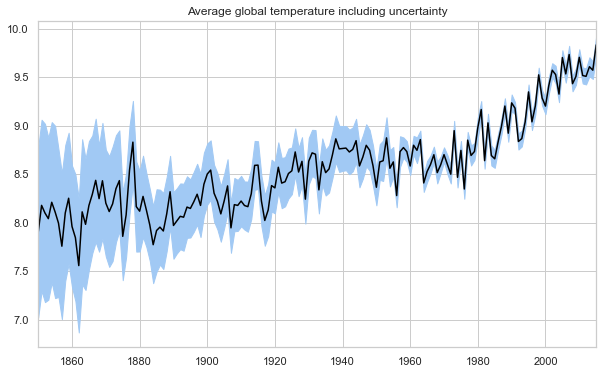

In [14]:
sns.set(style="whitegrid")
sns.set_color_codes("pastel")
_, ax=plt.subplots(figsize=(10, 6))

plt.plot(all_data['dt'], all_data['LandAverageTemperature'], color='black')
ax.fill_between(all_data['dt'], all_data['minAvgTemp'], all_data['maxAvgTemp'], color='b')

plt.xlim(min_year, max_year)
ax.set_title('Average global temperature including uncertainty')

plt.show()

In [15]:
global_temp_country = pd.read_csv('datasets/GlobalLandTemperaturesByCountry.csv')
global_temp_country_clear = global_temp_country[~global_temp_country['Country'].isin(
    ['Denmark', 'Antarctica', 'France', 'Europe', 'Netherlands',
     'United Kingdom', 'Africa', 'South America'])]

global_temp_country_clear = global_temp_country_clear.replace(
   ['Denmark (Europe)', 'France (Europe)', 'Netherlands (Europe)', 'United Kingdom (Europe)'],
   ['Denmark', 'France', 'Netherlands', 'United Kingdom'])

countries = np.unique(global_temp_country_clear['Country'])
mean_temp = []
for country in countries:
    mean_temp.append(global_temp_country_clear[global_temp_country_clear['Country'] == 
                                               country]['AverageTemperature'].mean())

Average Temperature by Country

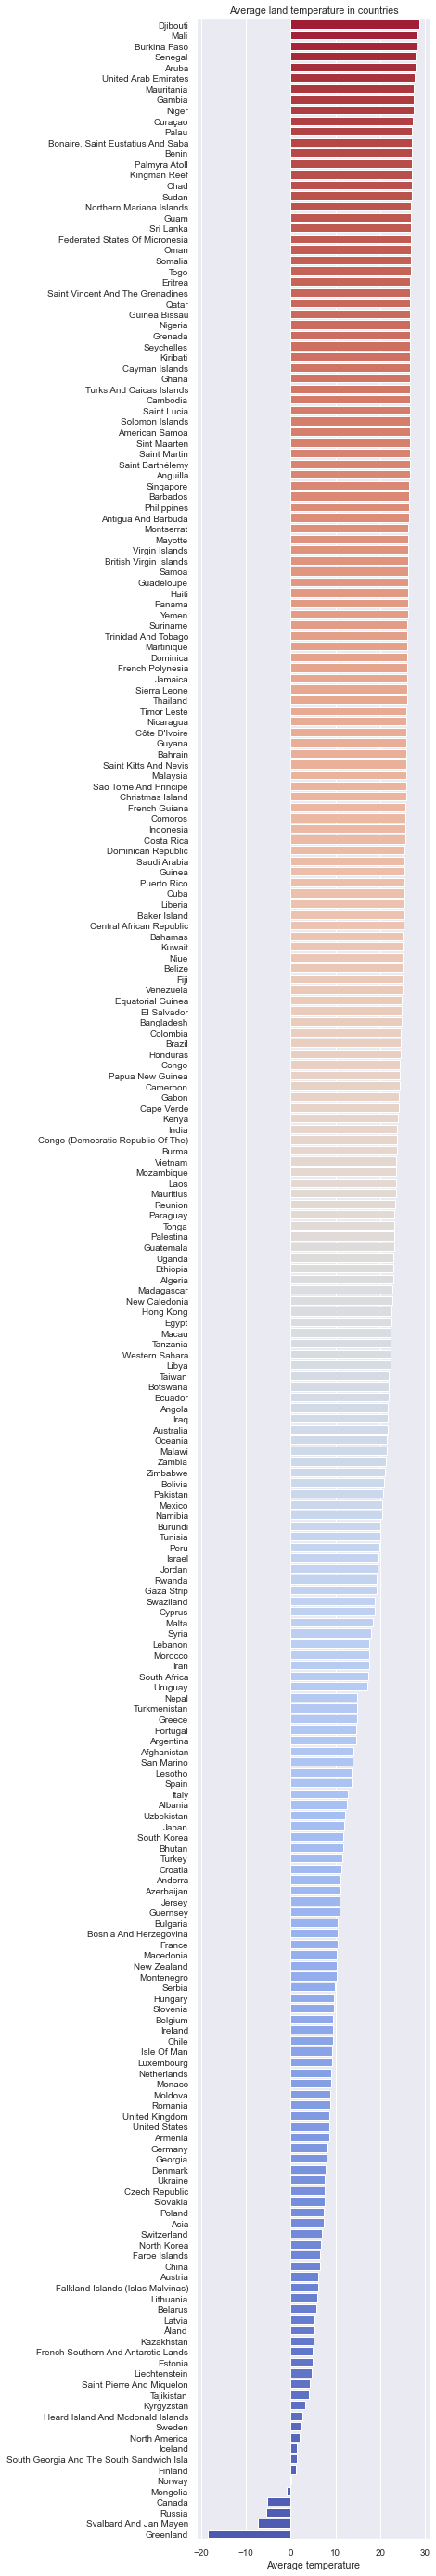

In [16]:
mean_temp_bar, countries_bar = (list(x) for x in zip(*sorted(zip(mean_temp, countries), 
                                                             reverse = True)))
sns.set(font_scale=0.9) 
f, ax = plt.subplots(figsize=(4.5, 50))
colors_cw = sns.color_palette('coolwarm', len(countries))
sns.barplot(mean_temp_bar, countries_bar, palette = colors_cw[::-1])
Text = ax.set(xlabel='Average temperature', title='Average land temperature in countries')

In [17]:
years = np.unique(global_temp_country_clear['dt'].apply(lambda x: x[:4]))
mean_temp_year_country = [ [0] * len(countries) for i in range(len(years[::10]))]

j = 0
for country in countries:
    all_temp_country = global_temp_country_clear[global_temp_country_clear['Country'] == country]
    i = 0
    for year in years[::10]:
        mean_temp_year_country[i][j] = all_temp_country[all_temp_country['dt'].apply(
                lambda x: x[:4]) == year]['AverageTemperature'].mean()
        i +=1
    j += 1

data = [ dict(
        type = 'choropleth',
        locations = countries,
        z = mean_temp,
        locationmode = 'country names',
        text = countries,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = '# Average\nTemperature,\n°C'),
            )
       ]

layout = dict(
    title = 'Average land temperature in countries',
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)

pyo.iplot(fig, validate=False, filename='world_temp_map')

### 2. Air Quality

Air quality can be degraded due to both natural and man made reasons. Natural sources include volcanic eruption and windstorm dust. Man-made sources include pollution from moving vehicles, toxic gases from industries, coal-powered plants, burning wood or other material in the open air, and landfills1. The major pollutants that cause bad air quality are sulfur dioxide, nitrogen dioxide, ozone, carbon monoxide, particulate matter (PM10 and PM2.5), volatile organic compounds (VOCs), and chlorofluorocarbons (CFCs). The impact of worsening air quality can be severe on human health and the environment. According to the World Health Organization (WHO), each year air pollution is responsible for nearly seven million deaths around the globe

Dataset obtained from https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset

In [18]:
data = pd.read_csv('datasets/global air pollution dataset.csv')

In [19]:
def make_heatmap_cities_per_countries_and_categories(
    list_of_countries,
    category_column,
    ylabel,
    xlabel,
    plttitle,
    palette
):

    df = data.query('country in @list_of_countries')
    for column in str_cols_list:
        i = 0
        for item in ['Good', 'Moderate', 'Unhealthy for Sensitive Groups',
                     'Unhealthy', 'Very Unhealthy', 'Hazardous']:
            i+=1
            df.loc[df[column] == item, column] = f'{i}. {item}'
    
    
    fig, ax = plt.subplots(figsize = [10, 10])
    this_crosstab = pd.crosstab(
        index=df.country,
        columns=df[category_column],
        values=df['city'],
        aggfunc='count',
        normalize='index'
    )

    sns.heatmap(
        this_crosstab
        .sort_values(by='1. Good', ascending=False),
        cmap=palette,
        annot=True,
        fmt='.2%',
        linecolor='#959595',
        linewidths=.75,
        cbar=False
    )

    plt.ylabel(ylabel)

    plt.xlabel(xlabel)
    plt.xticks(ticks = [0.5, 1.5, 2.5, 3.5, 4.5, 5.5],
               labels=['Good', 'Moderate', 'Unhealthy\nfor Sensitive\nGroups',
                     'Unhealthy', 'Very\nUnhealthy', 'Hazardous'],
              rotation=360,
               ha='center')

    ax.set_title(plttitle,
              fontsize=25,
              loc='left')
    ax.patch.set(hatch='xx', edgecolor='lightgrey')

    plt.show()

column_description = [
    ['aqi', 'air quality index (AQI)', 'Air quality index (AQI): shows how polluted the air currently is\nor how polluted it is forecast to become.'],
    ['co_aqi', 'carbon monoxide (CO)', 'Carbon Monoxide is a colorless and odorless gas.\nOutdoor, it is emitted in the air above all by cars,\ntrucks and other vehicles or machineries that burn fossil fuels.'],
    ['ozone_aqi', 'ozone (O3)', 'Ground level ozone can provoke several health problems like chest pain,\ncoughing, throat irritation and airway inflammation.'],
    ['no2_aqi', 'nitrogen dioxide (NO2)', 'At the surface level, NO2 forms from cars, trucks and buses emissions,\npower plants and off-road equipment.\nExposures may contribute to develoment of asthma and respiratory infections.'],
    ['pm2_5_aqi', 'atmospheric particulate matter (PM2.5)', 'Atmospheric Particulate Matter, also known as atmospheric aerosol particles,\nare complex mixtures of small solid and liquid matter that get into the air.\nIf inhaled they can cause serious heart and lungs problem.']
              ]

Data Preparation

In [20]:
data.columns = (
    data
    .columns
    .str.lower()
    .str.replace(' ', '_', regex=False)
    .str.replace('.', '_', regex=False)
)

data_dict = dict()

num_cols_list = data.select_dtypes(include='number').columns.to_list()
str_cols_list = data.select_dtypes(include='object').columns.to_list()

str_cols_list.remove('country')
str_cols_list.remove('city')

data_dict['str_cols_list'] = str_cols_list
data_dict['num_cols_list'] = num_cols_list

In [21]:
try:
    data.loc[data['country' == 'Unknown']]
except KeyError:
    print('None')
    
data['country'] = data['country'].fillna('Unknown')
print(f"Missing values: {data['country'].isna().sum()}")

None
Missing values: 0


In [22]:
for pair in [
    ['Republic of North Macedonia', 'North Macedonia'],
    ['Iran (Islamic Republic of)', 'Iran'],
    ['Bolivia (Plurinational State of)', 'Bolivia'],
    ['Venezuela (Bolivarian Republic of)', 'Venezuela'],
    ['United Arab Emirates', 'UAE'],
    ['Syrian Arab Republic', 'Syria'],
    ['Russian Federation', 'Russia'],
    ['United Kingdom of Great Britain and Northern Ireland', 'UK'],
    ['United States of America', 'USA'],
    ['State of Palestine', 'Palestine'],
    ['Central African Republic', 'CAR'],
    ['Republic of Korea', 'South Korea'],
    ['Democratic Republic of the Congo', 'DRC'],
    ['Laos', "Lao People's Democratic Republic"],
    ['Kingdom of Eswatini', 'Eswatini'],
    ['United Republic of Tanzania', 'Tanzania']
]:

    data['country'] = data['country'].replace(pair[0], pair[1], regex=False) 

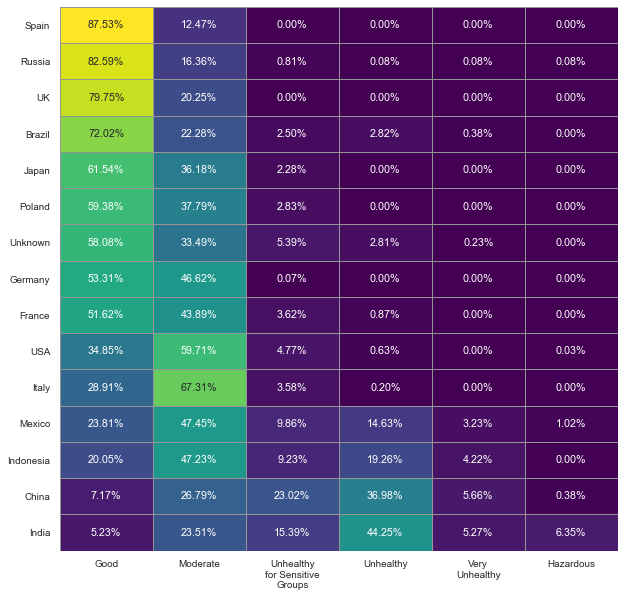

In [23]:
top_list = (data.groupby('country')
               ['aqi_category'].count()
               .sort_values(ascending=False)
               .head(15)
               .index
               .to_list())

make_heatmap_cities_per_countries_and_categories(
    list_of_countries=top_list,
    category_column='aqi_category',
    ylabel='',
    xlabel='',
    plttitle="",
    palette='viridis'
)

This heatmap shows the quality of air based on the percentage of the measured air quality. For instance, Spain has the best outlook from this visualization as 87.53% of all recordings from Spain are of Good Air Quality Index. India on the other hand has most of their measurements at "Unhealthy" levels of AQI

Taking countries with more than 100 entires only for data consistency

In [24]:
many_cities_df = (
    data
    .groupby('country')
    .agg(entries=('aqi_category', 'count'))
    .sort_values(ascending=False, by='entries') 
)

many_cities_countries_list = many_cities_df.query('entries > 100').index.to_list()

many_cities_df = data.query('country in @many_cities_countries_list')
many_cities_df_agg = (
    many_cities_df.groupby('country')
    .agg(
        avg_aqi_value=('aqi_value', 'median'),
        max_aqi_value=('aqi_value', 'max'),
        avg_co_aqi_value=('co_aqi_value', 'median'),
        max_co_aqi_value=('co_aqi_value', 'max'),
        avg_ozone_aqi_value=('ozone_aqi_value', 'median'),
        max_ozone_aqi_value=('ozone_aqi_value', 'max'),
        avg_no2_aqi_value=('no2_aqi_value', 'median'),
        max_no2_aqi_value=('no2_aqi_value', 'max'),
        avg_pm2_5_aqi_value=('pm2_5_aqi_value', 'median'),
        max_pm2_5_aqi_value=('pm2_5_aqi_value', 'max')
    )
)

(
    many_cities_df_agg.loc[:, many_cities_df_agg.columns.str.contains('avg_')]
    .sort_values(by='avg_aqi_value', ascending=False)
    .astype('int')
    .style.background_gradient('Blues')
)

On average, it is seen that Pakistan and India has the worst AQI among the well reported countries. 

In [25]:
data_countries = data.groupby('country').agg(
        avg_aqi_value=('aqi_value', 'median'),
        max_aqi_value=('aqi_value', 'max'),
        avg_co_aqi_value=('co_aqi_value', 'median'),
        max_co_aqi_value=('co_aqi_value', 'max'),
        avg_ozone_aqi_value=('ozone_aqi_value', 'median'),
        max_ozone_aqi_value=('ozone_aqi_value', 'max'),
        avg_no2_aqi_value=('no2_aqi_value', 'median'),
        max_no2_aqi_value=('no2_aqi_value', 'max'),
        avg_pm2_5_aqi_value=('pm2_5_aqi_value', 'median'),
        max_pm2_5_aqi_value=('pm2_5_aqi_value', 'max')
    )

#Removing South Korea because of erroneous value
data_countries = data_countries.drop('South Korea')


Average Air Quality Index (AQI) of all countries in the dataset

In [26]:
data = [ dict(
        type = 'choropleth',
        locations = data_countries.index,
        z = data_countries['avg_aqi_value'],
        locationmode = 'country names',
        text = data_countries.index,
        marker = dict(
            line = dict(color = 'rgb(0,0,0)', width = 1)),
            colorbar = dict(autotick = True, tickprefix = '',
            title = 'Average\nAQI'),
            )
       ]

layout = dict(
    title = 'Average AQI in countries',
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    geo = dict(
        showframe = False,
        showocean = True,
        oceancolor = 'rgb(0,255,255)',
        type = 'equirectangular'
    ),
)

fig = dict(data=data, layout=layout)

pyo.iplot(fig, validate=False, filename='world_temp_map')

### 3. Greenhouse Gases

Greenhouse gases are gases that trap heat in the atmosphere. Some of the sunlight incident on the Earth’s surface is reflected back into the atmosphere as infrared radiation and can then be absorbed by greenhouse gases present in the Earth’s atmosphere. Over time, the amount of energy sent from the sun to the Earth’s surface is roughly equal to the amount of energy radiated back into space. This leaves the surface temperature of Earth roughly constant. However, an increase in greenhouse gases in the atmosphere is causing the planet to increase in temperature. This is causing climate change. The effects of climate change include rising sea levels, more extreme weather and more forest fires.

Dataset obtained from https://www.kaggle.com/datasets/unitednations/international-greenhouse-gas-emissions

In [27]:
ds = pd.read_csv("datasets/greenhouse_gas_inventory_data_data.csv")
ds.head()

country_or_area  year          value  \
0       Australia  2014  393126.946994   
1       Australia  2013  396913.936530   
2       Australia  2012  406462.847704   
3       Australia  2011  403705.528314   
4       Australia  2010  406200.993184   

                                            category  
0  carbon_dioxide_co2_emissions_without_land_use_...  
1  carbon_dioxide_co2_emissions_without_land_use_...  
2  carbon_dioxide_co2_emissions_without_land_use_...  
3  carbon_dioxide_co2_emissions_without_land_use_...  
4  carbon_dioxide_co2_emissions_without_land_use_...

Shortening to abbreviations

In [28]:
ds = ds.assign(category=ds['category'].replace({
    'carbon_dioxide_co2_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': 'CO2',
    'greenhouse_gas_ghgs_emissions_including_indirect_co2_without_lulucf_in_kilotonne_co2_equivalent': 'GHG-indirect-CO2',
    'greenhouse_gas_ghgs_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': 'GHG',
    'hydrofluorocarbons_hfcs_emissions_in_kilotonne_co2_equivalent': 'HFC',
    'methane_ch4_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': 'CH4',
    'nitrogen_trifluoride_nf3_emissions_in_kilotonne_co2_equivalent': 'HF3',
    'nitrous_oxide_n2o_emissions_without_land_use_land_use_change_and_forestry_lulucf_in_kilotonne_co2_equivalent': 'N2Os',
    'perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent': 'PFCs',
    'sulphur_hexafluoride_sf6_emissions_in_kilotonne_co2_equivalent': 'SF6',
    'unspecified_mix_of_hydrofluorocarbons_hfcs_and_perfluorocarbons_pfcs_emissions_in_kilotonne_co2_equivalent': 'HFC-PFC-mix'
}))

In [29]:
ds = ds.rename(columns={'country_or_area': 'country'}).query("country != 'European Union'")

In [30]:
ds = ds.assign(country=ds['country'].replace({
    'Russian Federation': 'Russia',
    'United States of America': 'USA'
}))

ds = ds.assign(region=np.where(
    ds['country'].isin(['Japan', 'Australia', 'New Zealand', 'Russia', 'USA', 'Canada']),
    'non-European',
    'European'
))

CO2 Emissions

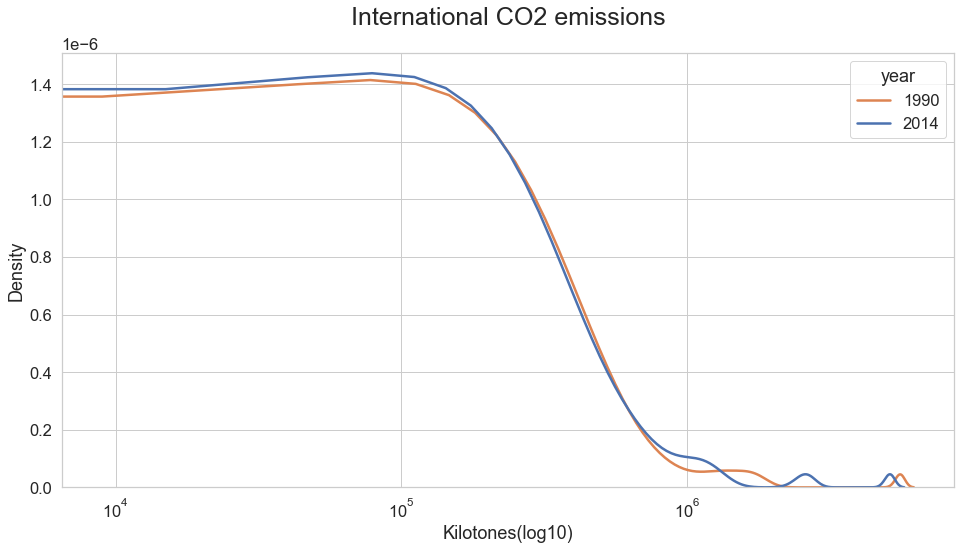

In [31]:
gas = 'CO2'
df_gas = ds.loc[(ds['category'] == gas) & (ds['year'].isin([1990, 2014])), :].copy()
df_gas['year'] = pd.Categorical(df_gas['year'].astype(str))

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

fig, ax = plt.subplots(figsize=(16,8))

sns.kdeplot(data=df_gas, x='value', hue='year', common_norm=False, alpha=.5, linewidth=2.5, bw_adjust=0.5, ax=ax)

ax.set(xscale='log', xlabel='Kilotones(log10)', ylabel='Density')
ax.set_title(f'International {gas} emissions', fontsize=25, y=1.05)

plt.legend(["1990", "2014"], title = 'year')
plt.show()

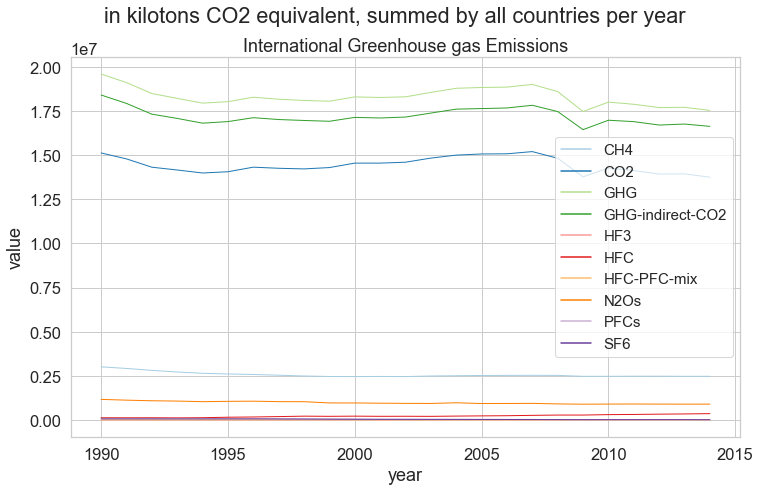

In [32]:
plt.figure(figsize=(12, 7))

t = ds.groupby(['category', 'year'])['value'].sum().reset_index()

sns.lineplot(data=t, x='year', y='value', hue='category', linewidth=1, palette='Paired')

plt.title('International Greenhouse gas Emissions')
plt.suptitle('in kilotons CO2 equivalent, summed by all countries per year')
plt.rcParams.update({'font.size': 20})
plt.legend(fontsize=15)

plt.show()

We can observe a general downward trend in emissions of greenhouse gases due to more environmental awareness and products designed taking environmental restrictions into account

### Methane, a Greenhouse Gas

Dataset obtained from https://www.kaggle.com/datasets/kkhandekar/methane-emissions-across-the-world-19902018

In [33]:
data = pd.read_csv("datasets/methane_hist_emissions.csv")
data_raw = data.copy()
data.head()

Country                Sector  Gas    Unit     2018     2017     2016  \
0   China  Total including LUCF  CH4  MTCO2e  1238.95  1239.28  1242.43   
1   China  Total excluding LUCF  CH4  MTCO2e  1238.63  1239.13  1242.15   
2  Russia  Total including LUCF  CH4  MTCO2e   853.00   852.12   856.00   
3  Russia  Total excluding LUCF  CH4  MTCO2e   849.57   850.17   852.55   
4   China                Energy  CH4  MTCO2e   739.58   741.73   743.88   

      2015     2014     2013  ...    1999    1998    1997    1996    1995  \
0  1237.79  1206.51  1178.21  ...  826.57  814.80  792.55  824.63  798.90   
1  1237.52  1206.21  1178.02  ...  825.69  813.83  791.73  823.86  798.45   
2   837.01   833.59   827.06  ...  604.57  606.50  614.99  634.53  643.52   
3   835.56   830.22   825.64  ...  598.70  597.72  610.38  622.22  639.73   
4   746.03   723.02   700.01  ...  303.13  289.36  275.59  261.82  248.05   

     1994    1993    1992    1991    1990  
0  774.10  758.01  752.10  743.51  730.78  
1  773.65  757.56  751.66  743.07  730.34  
2  670.71  728.51  784.68  867.35  933.79  
3  666.92  724.72  780.89  863.52  929.97  
4  234.28  229.86  225.44  221.02  216.60  

[5 rows x 33 columns]

In [34]:
data[data.isna().any(axis=1)]

Country                        Sector  Gas    Unit  2018  2017  \
1190        Micronesia          Total excluding LUCF  CH4  MTCO2e  0.06  0.06   
1214        Micronesia                   Agriculture  CH4  MTCO2e  0.05  0.05   
1251  Marshall Islands          Total excluding LUCF  CH4  MTCO2e  0.03  0.03   
1291             Palau          Total excluding LUCF  CH4  MTCO2e  0.02  0.02   
1460        Micronesia  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   
1577  Marshall Islands                   Agriculture  CH4  MTCO2e  0.00  0.00   
1578  Marshall Islands  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   
1637             Palau                   Agriculture  CH4  MTCO2e  0.00  0.00   
1638             Palau  Land-Use Change and Forestry  CH4  MTCO2e  0.00  0.00   

      2016  2015  2014  2013  ...  1999  1998  1997  1996  1995  1994  1993  \
1190  0.06  0.05  0.05  0.05  ...  0.05  0.05  0.05  0.05  0.05  0.01  0.00   
1214  0.05  0.05  0.04  0.04  ...  0.04  0.04  0.04  0.04  0.04  0.00  0.00   
1251  0.03  0.03  0.03  0.03  ...  0.03  0.03  0.03  0.03  0.03  0.03  0.03   
1291  0.02  0.02  0.02  0.02  ...  0.02  0.02  0.01  0.01  0.01  0.01  0.01   
1460  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1577  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1578  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1637  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   
1638  0.00  0.00  0.00  0.00  ...  0.00  0.00  0.00  0.00  0.00  0.00  0.00   

      1992  1991  1990  
1190  0.00  0.00   NaN  
1214  0.00  0.00   NaN  
1251  0.03  0.03   NaN  
1291  0.01  0.01   NaN  
1460  0.00  0.00   NaN  
1577  0.00  0.00   NaN  
1578  0.00  0.00   NaN  
1637  0.00  0.00   NaN  
1638  0.00  0.00   NaN  

[9 rows x 33 columns]

In [35]:
data.query('Country in ["Micronesia", "Marshall Islands", "Palau"] \
                and Sector in ["Total excluding LUCF","Agriculture", "Land-Use Change and Forestry"]')[["Country","1990", "1991", "1992", "1993", "1994"]]

Country  1990  1991  1992  1993  1994
1190        Micronesia   NaN  0.00  0.00  0.00  0.01
1214        Micronesia   NaN  0.00  0.00  0.00  0.00
1251  Marshall Islands   NaN  0.03  0.03  0.03  0.03
1291             Palau   NaN  0.01  0.01  0.01  0.01
1460        Micronesia   NaN  0.00  0.00  0.00  0.00
1577  Marshall Islands   NaN  0.00  0.00  0.00  0.00
1578  Marshall Islands   NaN  0.00  0.00  0.00  0.00
1637             Palau   NaN  0.00  0.00  0.00  0.00
1638             Palau   NaN  0.00  0.00  0.00  0.00

In [36]:
data.loc[:,"1990"].fillna(0.0, inplace=True)

In [37]:
data = data.melt(id_vars=["Country", "Sector", "Gas", "Unit"], value_vars=[str(y) for y in range(1990,2019)], var_name="Year", value_name="Emission")
data.query('Country == "India"').head(10)

Country                        Sector  Gas    Unit  Year  Emission
8      India          Total including LUCF  CH4  MTCO2e  1990    524.84
9      India          Total excluding LUCF  CH4  MTCO2e  1990    522.74
13     India                   Agriculture  CH4  MTCO2e  1990    433.94
51     India                        Energy  CH4  MTCO2e  1990     66.17
74     India                         Waste  CH4  MTCO2e  1990     22.64
100    India            Fugitive Emissions  CH4  MTCO2e  1990     26.51
124    India         Other Fuel Combustion  CH4  MTCO2e  1990     39.66
645    India  Land-Use Change and Forestry  CH4  MTCO2e  1990      2.10
1127   India          Industrial Processes  CH4  MTCO2e  1990      0.00
1746   India          Total including LUCF  CH4  MTCO2e  1991    530.63

In [38]:
data = data.set_index(['Country', 'Year', 'Sector'])['Emission'].unstack(["Sector"]).reset_index()
data.columns.name= None
data.query('Country=="Maldives" and Year < "1995"')

Country  Year  Agriculture  Energy  Fugitive Emissions  \
3045  Maldives  1990          0.0     0.0                 0.0   
3046  Maldives  1991          0.0     0.0                 0.0   
3047  Maldives  1992          0.0     0.0                 0.0   
3048  Maldives  1993          0.0     0.0                 0.0   
3049  Maldives  1994          0.0     0.0                 0.0   

      Industrial Processes  Land-Use Change and Forestry  \
3045                   0.0                           0.0   
3046                   0.0                           0.0   
3047                   0.0                           0.0   
3048                   0.0                           0.0   
3049                   0.0                           0.0   

      Other Fuel Combustion  Total excluding LUCF  Total including LUCF  Waste  
3045                    0.0                  0.04                  0.04   0.04  
3046                    0.0                  0.05                  0.05   0.04  
3047                    0.0                  0.05                  0.05   0.05  
3048                    0.0                  0.05                  0.05   0.05  
3049                    0.0                  0.05                  0.05   0.05

In [39]:
data.fillna(0.0, inplace=True)
data.isna().sum()

Country                         0
Year                            0
Agriculture                     0
Energy                          0
Fugitive Emissions              0
Industrial Processes            0
Land-Use Change and Forestry    0
Other Fuel Combustion           0
Total excluding LUCF            0
Total including LUCF            0
Waste                           0
dtype: int64

In [40]:
data = data[data.Country != "World"]
data["Total emissions (MTCO2e)"] = data["Total including LUCF"] + data["Fugitive Emissions"] + data["Other Fuel Combustion"]
data.head()

Country  Year  Agriculture  Energy  Fugitive Emissions  \
0  Afghanistan  1990         5.36    2.51                0.28   
1  Afghanistan  1991         5.61    2.29                0.24   
2  Afghanistan  1992         5.67    2.06                0.20   
3  Afghanistan  1993         5.72    1.84                0.16   
4  Afghanistan  1994         5.93    1.62                0.12   

   Industrial Processes  Land-Use Change and Forestry  Other Fuel Combustion  \
0                   0.0                           0.0                   2.23   
1                   0.0                           0.0                   2.04   
2                   0.0                           0.0                   1.86   
3                   0.0                           0.0                   1.68   
4                   0.0                           0.0                   1.50   

   Total excluding LUCF  Total including LUCF  Waste  Total emissions (MTCO2e)  
0                  8.97                  8.97   1.09                     11.48  
1                  9.07                  9.07   1.17                     11.35  
2                  8.99                  8.99   1.25                     11.05  
3                  8.89                  8.89   1.33                     10.73  
4                  8.96                  8.96   1.41                     10.58

In [41]:
yearwise_total_emms = data.groupby("Year")["Total emissions (MTCO2e)"].sum().to_frame().reset_index()

In [42]:
px.line(
    data_frame=yearwise_total_emms,
    x="Year",
    y="Total emissions (MTCO2e)",
    title="Total Emissions over the years",
    template=dict(
        layout=go.Layout(
            title_x=0.5,
            xaxis={
                "showgrid": False,
                "ticks": "inside"
            },
            yaxis={
                "showgrid": True,
                "ticks": "inside"
            }
        )
    ),
    markers=True,
    color_discrete_sequence=["orange"]

)

We observe an upwards trend in total methan emission across all sectors globally

In [43]:
countrywise_total_emms = data.groupby("Country")["Total emissions (MTCO2e)"].sum()

In [44]:
countrywise_total_emms

Country
Afghanistan    1296.05
Albania         108.03
Algeria        1902.24
Andorra           1.13
Angola         1411.29
                ...   
Venezuela      3243.76
Vietnam        2463.62
Yemen           208.80
Zambia          714.34
Zimbabwe        373.29
Name: Total emissions (MTCO2e), Length: 194, dtype: float64

In [45]:
fig = px.choropleth(data, locations="Country",
                    color="Total emissions (MTCO2e)", 
                    locationmode='country names',
                    hover_name="Country",
                    hover_data=['Total emissions (MTCO2e)'],
                    animation_frame = data.Year,
                    labels={'Total emissions (MTCO2e)':'Total Emissions'},
                    title = 'Total Methane Emissions 1990-2018')

fig.update_layout(
    autosize=False,
    width=1200,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    template='seaborn',
    paper_bgcolor="rgb(234, 234, 242)",
    legend=dict(
        orientation="v",
        yanchor="auto",
        y=1.02,
        xanchor="right",
        x=1
))

fig.show()

Top countries by Methane Emission

In [46]:
px.bar(
    data_frame=countrywise_total_emms.sort_values(ascending=False)[:25].to_frame().reset_index(),
    x="Total emissions (MTCO2e)",
    y="Country",
    orientation='h',
    color="Country",
    title="Top 25 Countries by Emission",
    template={
        "layout": go.Layout(
            title_x=0.5,
            xaxis={
                "showgrid": True,
                "gridwidth": 2,
                "ticks": "inside",
            },
            yaxis={
                "showticklabels": True,
                "type": 'category',
                "dtick": 1
            }
        )
    }
)

China, Russia and the United States are the top three countries that emit Methane

In [47]:
def get_top_rank(d, n=5):
    d = d.sort_values(by="Total emissions (MTCO2e)",ascending=False).head(n)["Country"]
    d.index = np.arange(len(d)) + 1
    d.index = "Rank #" + d.index.astype(str)
    d = d.transpose()
    return d

In [48]:
data[data.Country != "World"].groupby("Year").apply(get_top_rank).sort_index(ascending=False)[:5]

Country Rank #1 Rank #2        Rank #3 Rank #4              Rank #5
Year                                                               
2018      China  Russia  United States   India  European Union (27)
2017      China  Russia  United States   India  European Union (27)
2016      China  Russia  United States   India  European Union (27)
2015      China  Russia  United States   India  European Union (27)
2014      China  Russia  United States   India  European Union (27)

In [49]:
data[data.Country != "World"].groupby("Year").apply(get_top_rank).sort_index(ascending=True)[:10]

Country Rank #1        Rank #2        Rank #3              Rank #4  \
Year                                                                 
1990     Russia  United States          China  European Union (27)   
1991     Russia  United States          China  European Union (27)   
1992     Russia  United States          China  European Union (27)   
1993     Russia  United States          China  European Union (27)   
1994     Russia  United States          China  European Union (27)   
1995     Russia  United States          China  European Union (27)   
1996      China  United States         Russia  European Union (27)   
1997      China  United States         Russia  European Union (27)   
1998      China         Russia  United States                India   
1999      China         Russia  United States                India   

Country              Rank #5  
Year                          
1990                   India  
1991                   India  
1992                   India  
1993                   India  
1994                   India  
1995                   India  
1996                   India  
1997                   India  
1998     European Union (27)  
1999     European Union (27)

In [50]:
data_2018 = data.query('Year=="2018"')
data_2018.rename(columns={"Total emissions (MTCO2e)": "Total emissions"}, inplace=True)

Methane Emission by Sector

In [51]:
rows = 4
cols = 2

sectors = [ 'Total emissions', 'Agriculture', 'Energy', 'Waste', 'Land-Use Change and Forestry',
       'Fugitive Emissions', 'Other Fuel Combustion',  'Industrial Processes']

subplot_titles = [l for l in sectors]

specs = [[{'type':'bar'}] * cols] * rows

fig = make_subplots(
        rows=rows,
        cols=cols,
        subplot_titles=subplot_titles,
        specs=specs)

for i, s in enumerate(sectors):
    row = i // cols + 1
    col = i % cols +1
    
    d = data_2018.sort_values(by=s,ascending=False)[:5]
    
    
    fig.add_trace(
        go.Bar(
            x=d["Country"],
            y=d[s],
            showlegend=False,
            legendgroup="Countries",
            textposition='outside',
            texttemplate="%{y}",
            name=s
        ),
        row=row,
        col=col
    )
    
for i in range(1,rows*cols+1): 
    fig['layout']['yaxis{}'.format(i)]['title']= 'Emissions (MTCO2e)'

fig.update_layout(title="Top 5 Methane Contributors By Sector", title_x=0.5, height=1500)
fig.update_yaxes(
    range=[0,2500],
)
fig.show()

### 4. Sea Levels

Sea levels are rising due to two main reasons: melting of land-based ice sheets and mountain glaciers, which adds to the ocean’s volume, and thermal expansion, or the ocean water’s expansion as it warms.  
As global temperatures rise due to climate change, ice caps and glaciers are experiencing a disproportionate amount of melting at an accelerated rate. Warmer ocean temperatures also cause water to expand, resulting in sea level rise

Dataset obtained from https://www.kaggle.com/datasets/somesh24/sea-level-change

In [52]:
data = pd.read_csv('datasets/sea_levels_2015.csv')
data.head()

Time   GMSL  GMSL uncertainty
0  1880-01-15 -183.0              24.2
1  1880-02-15 -171.1              24.2
2  1880-03-15 -164.3              24.2
3  1880-04-15 -158.2              24.2
4  1880-05-15 -158.7              24.2

In [53]:
data.Time=data.Time.apply(lambda x:datetime.datetime.strptime(x, '%Y-%m-%d'))
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1608 entries, 0 to 1607
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Time              1608 non-null   datetime64[ns]
 1   GMSL              1608 non-null   float64       
 2   GMSL uncertainty  1608 non-null   float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 37.8 KB
None


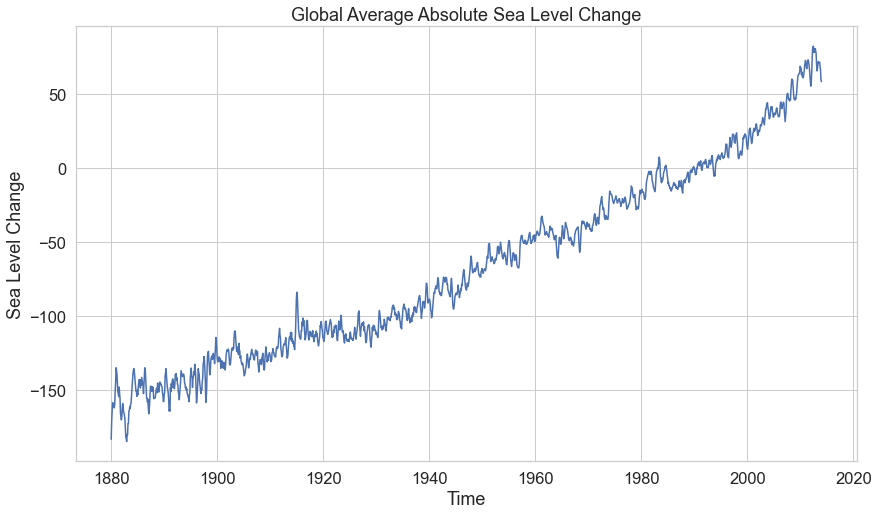

In [54]:
ts=data.groupby(["Time"])["GMSL"].sum()
ts.astype('float')
plt.figure(figsize=(14,8))
plt.title('Global Average Absolute Sea Level Change')
plt.xlabel('Time')
plt.ylabel('Sea Level Change')
plt.plot(ts)

It is observed that the sea level is tending to rise over time. This is due to the global temperature increases which leads to the melting of more and more ice caps

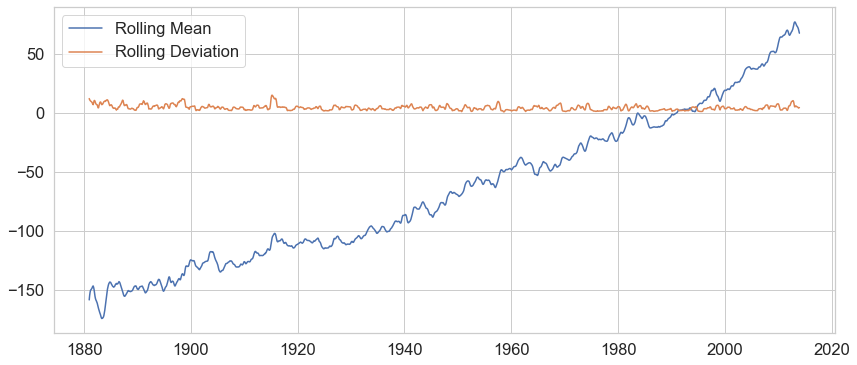

In [55]:
plt.figure(figsize=(14,6))
plt.plot(ts.rolling(window=12,center=False).mean(),label='Rolling Mean')
plt.plot(ts.rolling(window=12,center=False).std(),label='Rolling Deviation')
plt.legend()

In [56]:
data['Time'] = pd.to_datetime(data['Time'])

data['year'] = data['Time'].dt.year

data_mean = data.groupby('year').mean()

data_mean

GMSL  GMSL uncertainty
year                              
1880 -158.725000         24.200000
1881 -153.058333         24.200000
1882 -169.883333         23.008333
1883 -164.591667         22.800000
1884 -143.750000         22.200000
...          ...               ...
2009   58.016667          6.883333
2010   65.750000          7.116667
2011   67.300000          7.550000
2012   76.083333          8.300000
2013   67.725000          8.841667

[134 rows x 2 columns]

In [57]:
all_data

globalMeanTemp = all_data[['dt', 'LandAverageTemperature']]

globalMeanTemp

dt  LandAverageTemperature
0    1850                7.900667
1    1851                8.178583
2    1852                8.100167
3    1853                8.041833
4    1854                8.210500
..    ...                     ...
161  2011                9.516000
162  2012                9.507333
163  2013                9.606500
164  2014                9.570667
165  2015                9.831000

[166 rows x 2 columns]

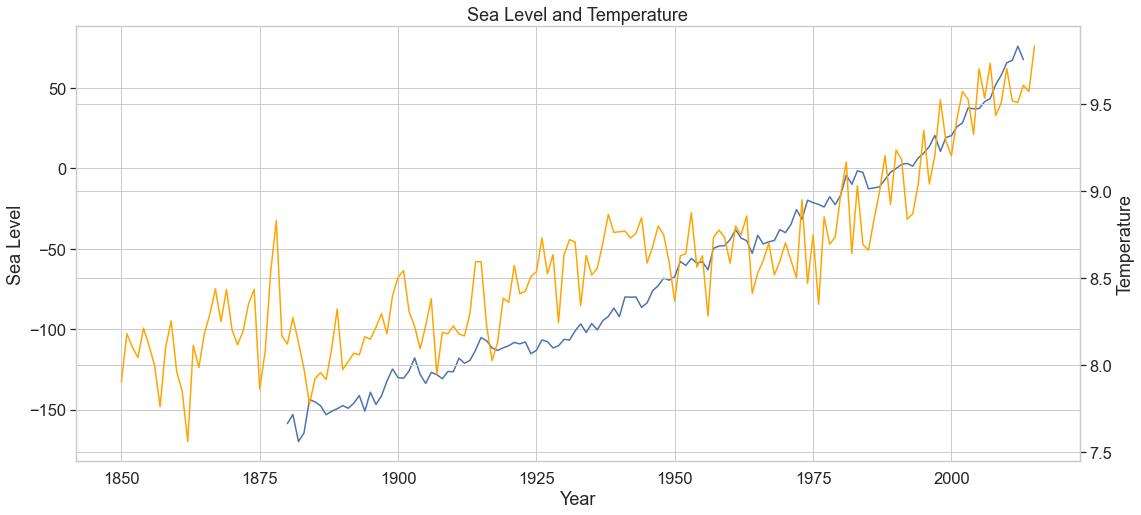

In [58]:
fig, ax = plt.subplots(figsize = [18,8])
ax.plot(data_mean.index, data_mean['GMSL'], label = 'Average Sea Level')
ax.set_xlabel('Year')
ax.set_ylabel('Sea Level')
ax2 = ax.twinx()
ax2.plot(globalMeanTemp['dt'], globalMeanTemp['LandAverageTemperature'], label = 'Average Temperature', color = 'orange')
ax2.set_ylabel('Temperature')
ax.set_title('Sea Level and Temperature')
plt.show()

Here we can observe the correlation between the rising temperatures and the rising sea level